In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

In [3]:
# load dataset
train = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')

In [4]:
# preprocessing stage
X_train_columns = train.columns.drop(['label'])
X_train = train[X_train_columns]
y_train = train['label']

In [5]:
# scaling stage
train_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = train_scaler.transform(X_train)
test_scaler = preprocessing.StandardScaler().fit(X_test)
X_test_scaled = test_scaler.transform(X_test)

In [6]:
# without scaling => 0.93 and after scaling => 0.95
clf = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)
print(clf.score(X_train_scaled, y_train))
# print(clf.predict_proba(X_test))
predicted = clf.predict(X_test_scaled)

c:\users\imani\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9507142857142857


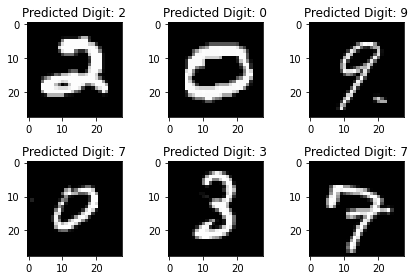

In [7]:
# X_train_numpy = X_train.to_numpy().reshape(42000, 28, 28)
# y_train_numpy = y_train.to_numpy().reshape(42000, 1)
X_test_numpy = X_test.to_numpy().reshape(28000, 28, 28)
# fig = plt.figure()
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.tight_layout()
    plt.imshow(X_test_numpy[i], cmap='gray')
    plt.title(f'Predicted Digit: {predicted[i]}')